# Import Libraries

In [2]:
from sympy import init_session
import math
import matplotlib.pyplot as plt
import sys
import ipywidgets as widgets
import numpy as np
import imageio.v2 as imageio
from IPython.display import Image
import pandas as pd
import seaborn as sns

init_session(use_latex = True)

IPython console for SymPy 1.13.2 (Python 3.10.1-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.2/



<img src = "https://raw.githubusercontent.com/alejo1630/4bar_mechanism/main/Images/4Bar.png" width = "500">

# 4 bar members

In [40]:
# Size

a = 1.97 * 0.0254 #m R2
b = 12.4 * 0.0254 #m R3
c = 3.17 * 0.0254 #m R4
d = 13.4 * 0.0254 #m R1

a, b, c, d

## Grashof Law

In [41]:
links = sorted([a, b, c, d])
s = links[0]
p = links[1]
q = links[2]
l = links[3]

s, p, q, l

### Grashof Mechanism
$$S + L < P + Q$$

* **Crank and Rocker Mechanism**

<img src = "https://raw.githubusercontent.com/alejo1630/4bar_mechanism/main/Images/Crank_Rocker.png" width = "300">

* **Double Crank Mechanism**

<img src = "https://raw.githubusercontent.com/alejo1630/4bar_mechanism/main/Images/Double_Crank.png" width = "250">

* **Double Rocker Mechanism**

<img src = "https://raw.githubusercontent.com/alejo1630/4bar_mechanism/main/Images/Double_Rocker.png" width = "250">

### Triple Rocker Mechanism
$$S + L > P + Q$$

<img src = "https://raw.githubusercontent.com/alejo1630/4bar_mechanism/main/Images/Triple_Rocker.png" width = "300">

### Change Point State
$$S + L = P + Q$$

<img src = "https://raw.githubusercontent.com/alejo1630/4bar_mechanism/main/Images/Change_Point.png" width = "300">


In [42]:
class_mechanism = ""

if (s + l) < (p + q):

    if (s == a) or (s == c):

        class_mechanism = "Crank and Rocker"

    elif (s == d):

        class_mechanism = "Double Crank"

    elif (s == b):

        class_mechanism = "Double Rocker"

else:

    print("The mechanism is an unstable geometry condition")
    print("The program will ends")
    sys.exit(0)

print(f"The mechanism is a {class_mechanism}")

The mechanism is a Crank and Rocker


# Input Data

In [43]:
if (class_mechanism == "Crank and Rocker") or (class_mechanism == "Double Crank"):

    accordion = widgets.Accordion(children = [widgets.RadioButtons(options = ["R2", "R4"]),
                                              widgets.BoundedFloatText(value = 0, max = 360),
                                              widgets.BoundedFloatText(value = 0, max = 1000),
                                              widgets.BoundedFloatText(value = 0, max = 1000)])

    accordion.set_title(0, 'Engine Input')
    accordion.set_title(1, 'Angular Position [Degrees]')
    accordion.set_title(2, 'Angular Velocity [rad/s]')
    accordion.set_title(3, 'Angular Acceleration [rad/s^2]')

elif class_mechanism == "Double Rocker":

    accordion = widgets.Accordion(children = [widgets.RadioButtons(options = ["R3"]),
                                              widgets.BoundedFloatText(value = 0, max = 360),
                                              widgets.BoundedFloatText(value = 0, max = 1000),
                                              widgets.BoundedFloatText(value = 0, max = 1000)])

    accordion.set_title(0, 'Engine Input')
    accordion.set_title(1, 'Angular Position [Degrees]')
    accordion.set_title(2, 'Angular Velocity [rad/s]')
    accordion.set_title(3, 'Angular Acceleration [rad/s^2]')

accordion

Accordion(children=(RadioButtons(options=('R2', 'R4'), value='R2'), BoundedFloatText(value=0.0, max=360.0), Bo…

# Kinematics

In [44]:
# Position
theta_2, theta_3, theta_4 = symbols("theta_2, theta_3, theta_4")

# Velocity
omega_2, omega_3, omega_4 = symbols("omega_2, omega_3, omega_4")

# Acceleration
alpha_2, alpha_3, alpha_4 = symbols("alpha_2, alpha_3, alpha_4")


theta_2, theta_3, theta_4, omega_2, omega_3, omega_4, alpha_2, alpha_3, alpha_4

In [45]:
# Set the input member (motor) kinematics properties

member = accordion.children[0].value

print(f"Input Member: {member}")

if member == "R2":

    theta_2 = math.radians(accordion.children[1].value)
    omega_2 = accordion.children[2].value
    alpha_2 = accordion.children[3].value

    print("Initial Position [rad]: ", theta_2, f"({accordion.children[1].value}°)")
    print("Initial Velocity [rad/s]: ", omega_2)
    print("Initial Acceleration [rad/s^2]: ", alpha_2)

elif member == "R3":

    theta_3 = math.radians(accordion.children[1].value)
    omega_3 = accordion.children[2].value
    alpha_3 = accordion.children[3].value

    print("Initial Position [rad]: ", theta_3, f"({accordion.children[1].value}°)")
    print("Initial Velocity [rad/s]: ", omega_3)
    print("Initial Acceleration [rad/s^2]: ", alpha_3)

elif member == "R4":

    theta_4 = math.radians(accordion.children[1].value)
    omega_4 = accordion.children[2].value
    alpha_4 = accordion.children[3].value

    print("Initial Position [rad]: ", theta_4, f"({accordion.children[1].value}°)")
    print("Initial Velocity [rad/s]: ", omega_4)
    print("Initial Acceleration [rad/s^2]: ", alpha_4)

Input Member: R2
Initial Position [rad]:  4.71238898038469 (270.0°)
Initial Velocity [rad/s]:  4.71
Initial Acceleration [rad/s^2]:  0.0


## Position Analysis

**Real Part**

$$a\cos{\theta_2} + b\cos{\theta_3} - c\cos{\theta_4} - d = 0$$

**Imaginary Part**

$$a\sin{\theta_2} + b\sin{\theta_3} - c\sin{\theta_4} = 0$$

In [46]:
# Solve position system equations

time = 3
dt = 0.01
position = []

# Error function
def error(Ini,Fin):
    err = sum(abs(Ini-Fin))
    return err

for i in np.arange (0, time + dt, dt):

    # Position Equations
    f1_pos = a*cos(theta_2) + b*cos(theta_3) - c*cos(theta_4) - d
    f2_pos = a*sin(theta_2) + b*sin(theta_3) - c*sin(theta_4)

    f_pos = Matrix([f1_pos, f2_pos])

    # Initial Conditions
    if i  == 0:

        ini_c = Matrix([1, 2])

        if member == "R2":

            initial_angle = theta_2

        elif member == "R3":

            initial_angle = theta_3

        elif member == "R4":

            initial_angle = theta_4

    else:

        ini_c = end_c

    # Unknow
    if member == "R2":

        var = Matrix([theta_3, theta_4])

    elif member == "R3":

        var = Matrix([theta_2, theta_4])

    elif member == "R4":

        var = Matrix([theta_2, theta_3])


    # Jacobian
    jacob = f_pos.jacobian(var)

    # Inverse Matrix
    inv_m = jacob.inv()

    # Final vector to save results

    end_c = Matrix([0,0])

    # Tolerance
    tol = 1e-6

    err = error(ini_c, end_c)
    con = 0

    while err > tol:

        if member == "R2":

            end_c = ini_c - inv_m.subs([(theta_3, ini_c[0]),(theta_4, ini_c[1])]) * f_pos.subs([(theta_3, ini_c[0]),(theta_4, ini_c[1])])

        elif member == "R3":

            end_c = ini_c - inv_m.subs([(theta_2, ini_c[0]),(theta_4, ini_c[1])]) * f_pos.subs([(theta_2, ini_c[0]),(theta_4, ini_c[1])])

        elif member == "R4":

            end_c = ini_c - inv_m.subs([(theta_2, ini_c[0]),(theta_3, ini_c[1])]) * f_pos.subs([(theta_2, ini_c[0]),(theta_3, ini_c[1])])


        err = error(ini_c.evalf(), end_c.evalf())
        ini_c = end_c.evalf()
        con += 1


        if con > 100:
            break


    print(f"time: {i}s, iterations: {con}")

    if member == "R2":

        theta_3_value = end_c[0]
        theta_4_value = end_c[1]

        position.append([theta_2, theta_3_value, theta_4_value])

        theta_2 = initial_angle + (omega_2 * i) + (0.5 * alpha_2 * i **2)


    elif member == "R3":

        theta_2_value = end_c[0]
        theta_4_value = end_c[1]

        position.append([theta_2_value, theta_3, theta_4_value])

        theta_3 = initial_angle + (omega_3 * i) + (0.5 * alpha_3 * i **2)


    elif member == "R4":

        theta_2_value = end_c[0]
        theta_3_value = end_c[1]

        position.append([theta_2_value, theta_3_value, theta_4])

        theta_4 = initial_angle + (omega_4 * i) + (0.5 * alpha_4 * i **2)


time: 0.0s, iterations: 6
time: 0.01s, iterations: 1
time: 0.02s, iterations: 3
time: 0.03s, iterations: 3
time: 0.04s, iterations: 3
time: 0.05s, iterations: 3
time: 0.06s, iterations: 3
time: 0.07s, iterations: 3
time: 0.08s, iterations: 3
time: 0.09s, iterations: 3
time: 0.1s, iterations: 3
time: 0.11s, iterations: 3
time: 0.12s, iterations: 3
time: 0.13s, iterations: 3
time: 0.14s, iterations: 3
time: 0.15s, iterations: 3
time: 0.16s, iterations: 3
time: 0.17s, iterations: 3
time: 0.18s, iterations: 3
time: 0.19s, iterations: 3
time: 0.2s, iterations: 3
time: 0.21s, iterations: 3
time: 0.22s, iterations: 3
time: 0.23s, iterations: 3
time: 0.24s, iterations: 3
time: 0.25s, iterations: 3
time: 0.26s, iterations: 3
time: 0.27s, iterations: 3
time: 0.28s, iterations: 3
time: 0.29s, iterations: 3
time: 0.3s, iterations: 3
time: 0.31s, iterations: 3
time: 0.32s, iterations: 3
time: 0.33s, iterations: 3
time: 0.34s, iterations: 3
time: 0.35000000000000003s, iterations: 3
time: 0.36s, iter

In [59]:
# Create plot for each position

for idx, i in enumerate(position):
    plt.plot([0, a * cos(i[0])], [0, a * sin(i[0])], "g")
    plt.plot([a * cos(i[0]), a * cos(i[0]) + b * cos(i[1])], [a * sin(i[0]), a * sin(i[0]) + b * sin(i[1])], "r")
    plt.plot([a * cos(i[0]) + b * cos(i[1]), d], [a * sin(i[0]) + b * sin(i[1]), 0], "b")


    plt.axis('square')
    plt.xlim([-0.1, 0.4])
    plt.ylim([-0.1, 0.1])


    plt.savefig(f'./videos/img_{idx}.png',
                transparent = False,
                facecolor = 'white')

    plt.close()

In [60]:
# Save frames

frames = []
for idx, i in enumerate(position):
    image = imageio.imread(f'./videos/img_{idx}.png')
    frames.append(image)

In [61]:
# Create a GIF

imageio.mimsave('./videos/example.gif', # output gif
                frames,          # array of input frames
                duration = len(frames),
                fps = 120)         # optional: frames per second

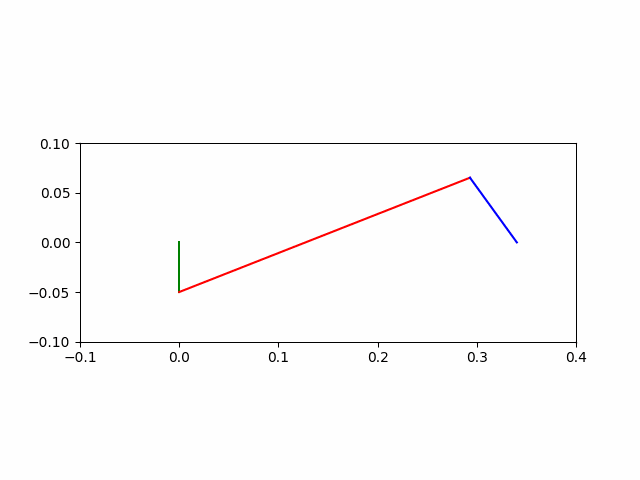

In [75]:
# Show GIF

Image(filename = './videos/example.gif')

In [63]:
# Plot angular position for each member

df = pd.DataFrame(data = position, columns = ["theta_2 [rad]", "theta_3 [rad]", "theta_4 [rad]"])
df["theta_2 [°]"] = [x * 180 / math.pi if x * 180 / math.pi <= 360 else x * 180 / math.pi - 360 * floor((x * 180 / math.pi) / 360) for x in df["theta_2 [rad]"]]
df["theta_3 [°]"] = [x * 180 / math.pi if x * 180 / math.pi <= 360 else x * 180 / math.pi - 360 * floor((x * 180 / math.pi) / 360) for x in df["theta_3 [rad]"]]
df["theta_4 [°]"] = [x * 180 / math.pi if x * 180 / math.pi <= 360 else x * 180 / math.pi - 360 * floor((x * 180 / math.pi) / 360)for x in df["theta_4 [rad]"]]
df.insert(0, "Time [s]", np.arange (0, time + dt, dt))
df.head()

,Time [s],theta_2 [rad],theta_3 [rad],theta_4 [rad],theta_2 [°],theta_3 [°],theta_4 [°]
0,0.00,4.712389,0.374591868114646,2.19777944202668,270.0,21.4625330828904,125.923486328746
1,0.01,4.712389,0.374591868114646,2.19777944202668,270.0,21.4625330828904,125.923486328746
2,0.02,4.759489,0.378869036051518,2.16953355846550,272.698631,21.7075967539418,124.305116412072
3,0.03,4.806589,0.382624490290328,2.14107213436043,275.397262,21.9227684319801,122.674396931920
4,0.04,4.853689,0.385846603477979,2.11241516809765,278.095894,22.1073819187460,121.032473711414


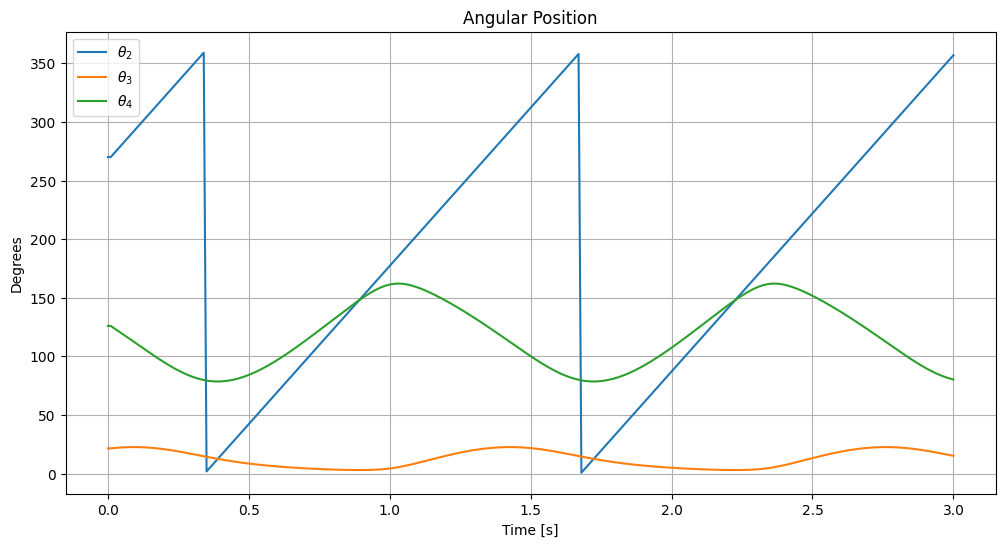

In [64]:
%matplotlib inline

fig, ax = plt.subplots(figsize = (12,6))

plt.plot(df["Time [s]"], df["theta_2 [°]"], label = r"$\theta_2$")
plt.plot(df["Time [s]"], df["theta_3 [°]"], label = r"$\theta_3$")
plt.plot(df["Time [s]"], df["theta_4 [°]"], label = r"$\theta_4$")

plt.xlabel("Time [s]")
plt.ylabel("Degrees")
plt.legend(loc = 0)
plt.grid()
plt.title("Angular Position")

plt.show()

## Velocity Analysis

<img src = "https://raw.githubusercontent.com/alejo1630/4bar_mechanism/main/Images/Velocity.png" width = "500">

**Real Part**

$$-a\omega_2\sin{\theta_2} - b\omega_3\sin{\theta_3} + c\omega_4\sin{\theta_4} = 0$$

**Imaginary Part**

$$a\omega_2\cos{\theta_2} + b\omega_3\cos{\theta_3} - c\omega_4\cos{\theta_4} = 0$$

In [65]:
if member == "R2":
    
    df["omega_2 [rad/s]"] = omega_2 + alpha_2 * df["Time [s]"]
    
    omega_3 = []
    omega_4 = []
    
    for i in range(df.shape[0]):
        left = [[b * cos(df["theta_3 [rad]"][i]), - c * cos(df["theta_4 [rad]"][i])],
                      [-b * sin(df["theta_3 [rad]"][i]), c * sin(df["theta_4 [rad]"][i])]]
        
        right = [[-a * df["omega_2 [rad/s]"][i] * cos(df["theta_2 [rad]"][i])],
                          [a * df["omega_2 [rad/s]"][i] * sin(df["theta_2 [rad]"][i])]]
    
        
        omegas = Matrix(left).inv() * Matrix(right)
        
        omega_3.append(omegas[0])
        omega_4.append(omegas[1])
    
    df["omega_3 [rad/s]"] = omega_3
    df["omega_4 [rad/s]"] = omega_4
    
elif member == "R3":
    
    df["omega_3 [rad/s]"] = omega_3 + alpha_3 * df["Time [s]"]
    
    omega_2 = []
    omega_4 = []
    
    for i in range(df.shape[0]):
        left = [[a * cos(df["theta_2 [rad]"][i]), - c * cos(df["theta_4 [rad]"][i])],
                      [-a * sin(df["theta_3 [rad]"][i]), c * sin(df["theta_4 [rad]"][i])]]
        
        right = [[-b * df["omega_3 [rad/s]"][i] * cos(df["theta_3 [rad]"][i])],
                          [b * df["omega_3 [rad/s]"][i] * sin(df["theta_3 [rad]"][i])]]
    
        
        omegas = Matrix(left).inv() * Matrix(right)
        
        omega_2.append(omegas[0])
        omega_4.append(omegas[1])
    
    df["omega_2 [rad/s]"] = omega_2
    df["omega_4 [rad/s]"] = omega_4

elif member == "R4":
    
    df["omega_4 [rad/s]"] = omega_4 + alpha_4 * df["Time [s]"]
    
    omega_2 = []
    omega_3 = []
    
    for i in range(df.shape[0]):
        left = [[a * cos(df["theta_2 [rad]"][i]), b * cos(df["theta_3 [rad]"][i])],
                      [-a * sin(df["theta_2 [rad]"][i]), -b * sin(df["theta_3 [rad]"][i])]]
        
        right = [[c * df["omega_4 [rad/s]"][i] * cos(df["theta_4 [rad]"][i])],
                          [-c * df["omega_44 [rad/s]"][i] * sin(df["theta_4 [rad]"][i])]]
    
        
        omegas = Matrix(left).inv() * Matrix(right)
        
        omega_2.append(omegas[0])
        omega_3.append(omegas[1])
    
    df["omega_3 [rad/s]"] = omega_2
    df["omega_4 [rad/s]"] = omega_3

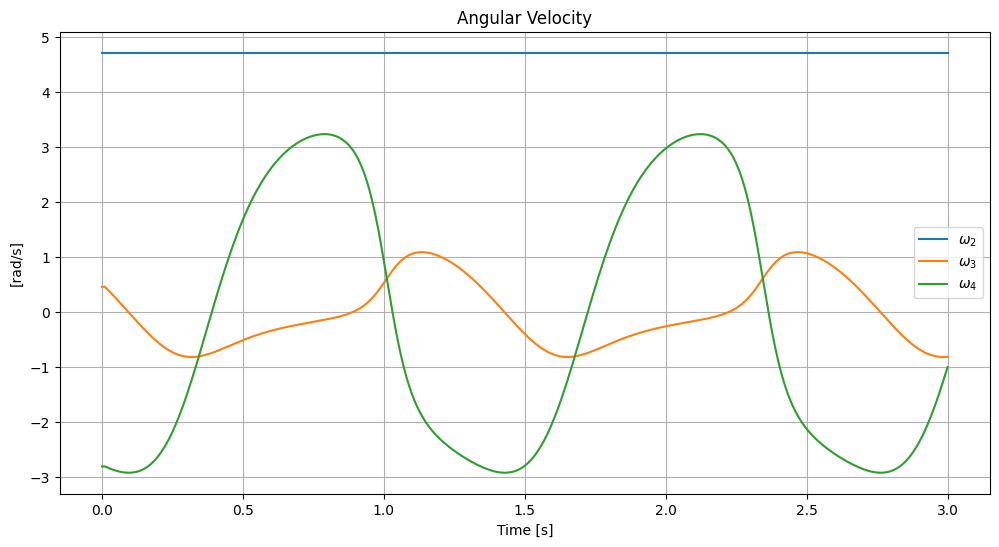

In [66]:
fig, ax = plt.subplots(figsize = (12,6))

plt.plot(df["Time [s]"], df["omega_2 [rad/s]"], label = r"$\omega_2$")
plt.plot(df["Time [s]"], df["omega_3 [rad/s]"], label = r"$\omega_3$")
plt.plot(df["Time [s]"], df["omega_4 [rad/s]"], label = r"$\omega_4$")

plt.xlabel("Time [s]")
plt.ylabel("[rad/s]")
plt.legend(loc = 0)
plt.grid()
plt.title("Angular Velocity")

plt.show()

## Acceleration Analysis

<img src = "https://raw.githubusercontent.com/alejo1630/4bar_mechanism/main/Images/Acceleration.png" width = "500">

**Real Part**

$$-a\alpha_2\sin{\theta_2}-a\omega_2^2\cos{\theta_2}-b\alpha_3\sin{\theta_3}-b\omega_3^2\cos{\theta_3}+c\alpha_4\sin{\theta_4}+c\omega_4^2\cos{\theta_4} = 0$$

**Imaginary Part**

$$a\alpha_2\cos{\theta_2}-a\omega_2^2\sin{\theta_2}+b\alpha_3\cos{\theta_3}-b\omega_3^2\sin{\theta_3}-c\alpha_4\cos{\theta_4}+c\omega_4^2\sin{\theta_4} = 0$$

In [67]:
if member == "R2":
    
    df["alpha_2 [rad/s^2]"] = alpha_2
    
    alpha_3 = []
    alpha_4 = []
    
    for i in range(df.shape[0]):
        left = [[-b * sin(df["theta_3 [rad]"][i]),  c * sin(df["theta_4 [rad]"][i])],
                      [b * cos(df["theta_3 [rad]"][i]), -c * cos(df["theta_4 [rad]"][i])]]
        
        right = [[a*df["alpha_2 [rad/s^2]"][i]*sin(df["theta_2 [rad]"][i]) + a*(df["omega_2 [rad/s]"][i])**2*cos(df["theta_2 [rad]"][i]) + b*(df["omega_3 [rad/s]"][i])**2*cos(df["theta_3 [rad]"][i]) - c*(df["omega_4 [rad/s]"][i])**2*cos(df["theta_4 [rad]"][i])],
                 [-a*df["alpha_2 [rad/s^2]"][i]*cos(df["theta_2 [rad]"][i]) + a*(df["omega_2 [rad/s]"][i])**2*sin(df["theta_2 [rad]"][i]) + b*(df["omega_3 [rad/s]"][i])**2*sin(df["theta_3 [rad]"][i]) - c*(df["omega_4 [rad/s]"][i])**2*sin(df["theta_4 [rad]"][i])]]
    
        
        alphas = Matrix(left).inv() * Matrix(right)
        
        alpha_3.append(alphas[0])
        alpha_4.append(alphas[1])
    
    df["alpha_3 [rad/s^2]"] = alpha_3
    df["alpha_4 [rad/s^2]"] = alpha_4
    
elif member == "R3":
    
    df["alpha_3 [rad/s^2]"] = alpha_3
    
    alpha_2 = []
    alpha_4 = []
    
    for i in range(df.shape[0]):
        left = [[-a * sin(df["theta_2 [rad]"][i]),  c * sin(df["theta_4 [rad]"][i])],
                      [a * cos(df["theta_2 [rad]"][i]), -c * cos(df["theta_4 [rad]"][i])]]
        
        right = [[b*df["alpha_3 [rad/s^2]"][i]*sin(df["theta_3 [rad]"][i]) + a*(df["omega_2 [rad/s]"][i])**2*cos(df["theta_2 [rad]"][i]) + b*(df["omega_3 [rad/s]"][i])**2*cos(df["theta_3 [rad]"][i]) - c*(df["omega_4 [rad/s]"][i])**2*cos(df["theta_4 [rad]"][i])],
                 [-b*df["alpha_3 [rad/s^2]"][i]*cos(df["theta_3 [rad]"][i]) + a*(df["omega_2 [rad/s]"][i])**2*sin(df["theta_2 [rad]"][i]) + b*(df["omega_3 [rad/s]"][i])**2*sin(df["theta_3 [rad]"][i]) - c*(df["omega_4 [rad/s]"][i])**2*sin(df["theta_4 [rad]"][i])]]
    
        
        alphas = Matrix(left).inv() * Matrix(right)
        
        alpha_2.append(alphas[0])
        alpha_4.append(alphas[1])
    
    df["alpha_2 [rad/s^2]"] = alpha_2
    df["alpha_4 [rad/s^2]"] = alpha_4
    
elif member == "R4":
    
    df["alpha_4 [rad/s^2]"] = alpha_4
    
    alpha_2 = []
    alpha_3 = []
    
    for i in range(df.shape[0]):
        left = [[-a * sin(df["theta_2 [rad]"][i]), -b * sin(df["theta_3 [rad]"][i])],
                      [a * cos(df["theta_2 [rad]"][i]), b * cos(df["theta_3 [rad]"][i])]]
        
        right = [[-c*df["alpha_4 [rad/s^2]"][i]*sin(df["theta_4 [rad]"][i]) + a*(df["omega_2 [rad/s]"][i])**2*cos(df["theta_2 [rad]"][i]) + b*(df["omega_3 [rad/s]"][i])**2*cos(df["theta_3 [rad]"][i]) - c*(df["omega_4 [rad/s]"][i])**2*cos(df["theta_4 [rad]"][i])],
                 [c*df["alpha_4 [rad/s^2]"][i]*cos(df["theta_4 [rad]"][i]) + a*(df["omega_2 [rad/s]"][i])**2*sin(df["theta_2 [rad]"][i]) + b*(df["omega_3 [rad/s]"][i])**2*sin(df["theta_3 [rad]"][i]) - c*(df["omega_4 [rad/s]"][i])**2*sin(df["theta_4 [rad]"][i])]]
    
        
        alphas = Matrix(left).inv() * Matrix(right)
        
        alpha_2.append(alphas[0])
        alpha_3.append(alphas[1])
    
    df["alpha_2 [rad/s^2]"] = alpha_2
    df["alpha_3 [rad/s^2]"] = alpha_3

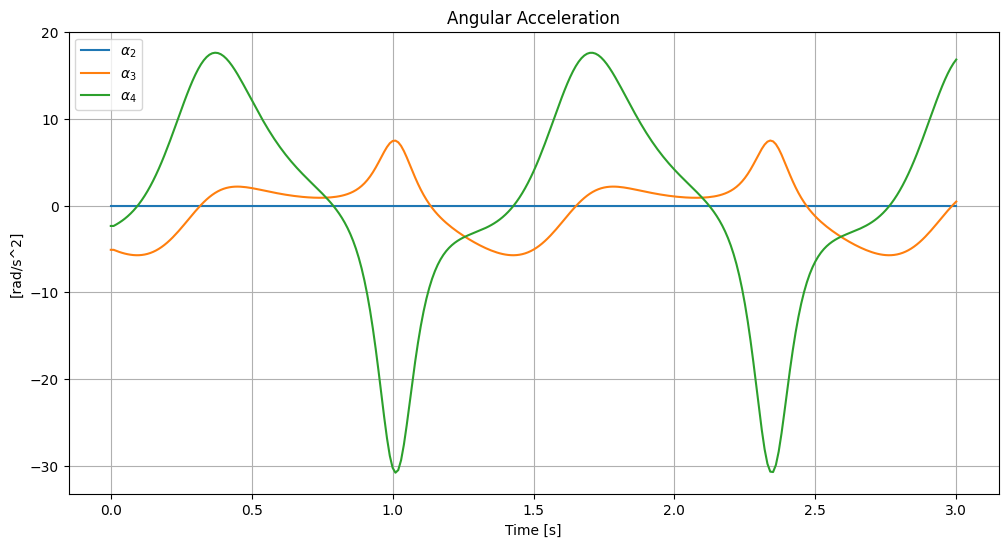

In [68]:
fig, ax = plt.subplots(figsize = (12,6))

plt.plot(df["Time [s]"], df["alpha_2 [rad/s^2]"], label = r"$\alpha_2$")
plt.plot(df["Time [s]"], df["alpha_3 [rad/s^2]"], label = r"$\alpha_3$")
plt.plot(df["Time [s]"], df["alpha_4 [rad/s^2]"], label = r"$\alpha_4$")

plt.xlabel("Time [s]")
plt.ylabel("[rad/s^2]")
plt.legend(loc = 0)
plt.grid()
plt.title("Angular Acceleration")

plt.show()

In [69]:
df.head()

,Time [s],theta_2 [rad],theta_3 [rad],theta_4 [rad],theta_2 [°],theta_3 [°],theta_4 [°],omega_2 [rad/s],omega_3 [rad/s],omega_4 [rad/s],alpha_2 [rad/s^2],alpha_3 [rad/s^2],alpha_4 [rad/s^2]
0,0.00,4.712389,0.374591868114646,2.19777944202668,270.0,21.4625330828904,125.923486328746,4.71,0.453384567384505,-2.81319286754465,0.0,-5.08984888117304,-2.33801957695050
1,0.01,4.712389,0.374591868114646,2.19777944202668,270.0,21.4625330828904,125.923486328746,4.71,0.453384567384504,-2.81319286754465,0.0,-5.08984888117304,-2.33801957695051
2,0.02,4.759489,0.378869036051518,2.16953355846550,272.698631,21.7075967539418,124.305116412072,4.71,0.401835191002346,-2.83568216350827,0.0,-5.21812927312479,-2.15696303623076
3,0.03,4.806589,0.382624490290328,2.14107213436043,275.397262,21.9227684319801,122.674396931920,4.71,0.349061679623363,-2.85626982562293,0.0,-5.33449675477856,-1.95721645185903
4,0.04,4.853689,0.385846603477979,2.11241516809765,278.095894,22.1073819187460,121.032473711414,4.71,0.295188711051651,-2.87475469872000,0.0,-5.43782444341343,-1.73593242477165


In [70]:
df.to_csv('4bardata.txt', sep='\t', header = None, index=True)
print(df.shape[0])



301
